In [1]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [2]:
data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23/2023_01_26_18_44_05_216L20quench.npy',allow_pickle=True).tolist()
t = np.array(data['nT'])[:,1] # scan time
detuning = np.array(data['nT'])[:,3] # detuning
rabi = np.array(data['nT'])[:,2] # Rabi
E = np.array(data['E']) # energy for the lowest three states
overlap = np.array(data['overlap'])# overlap with fm, afm, ground state, 1st excited state, 2nd excited state

In [14]:
N = np.shape(data['z'])[1]

In [4]:
# Dilila parameter
initial_detuning = -5
final_detuning = 3
gap = (E[:,2]-E[:,0])/2/np.pi
crit_id = np.argmin(gap)
initial_id = np.argmin(abs((detuning - initial_detuning)))
final_id = np.argmin(abs((detuning - final_detuning)))
print('scanned initial detuning '+ str(detuning[initial_id]))
print('initial gap '+ str(gap[initial_id]))
print('crit_detuning'+str(detuning[crit_id]))
print('crit_gap'+str(gap[crit_id]))
print('scanned initial detuning '+ str(detuning[final_id]))
print('final gap '+ str(gap[final_id]))

scanned initial detuning -5.0
initial gap 5.000000000000001
crit_detuning1.3999999999999775
crit_gap0.4434992702983832
scanned initial detuning 3.0
final gap 1.5958496931038162


Text(0, 0.5, 'Overlap <Ground state|evolve state>')

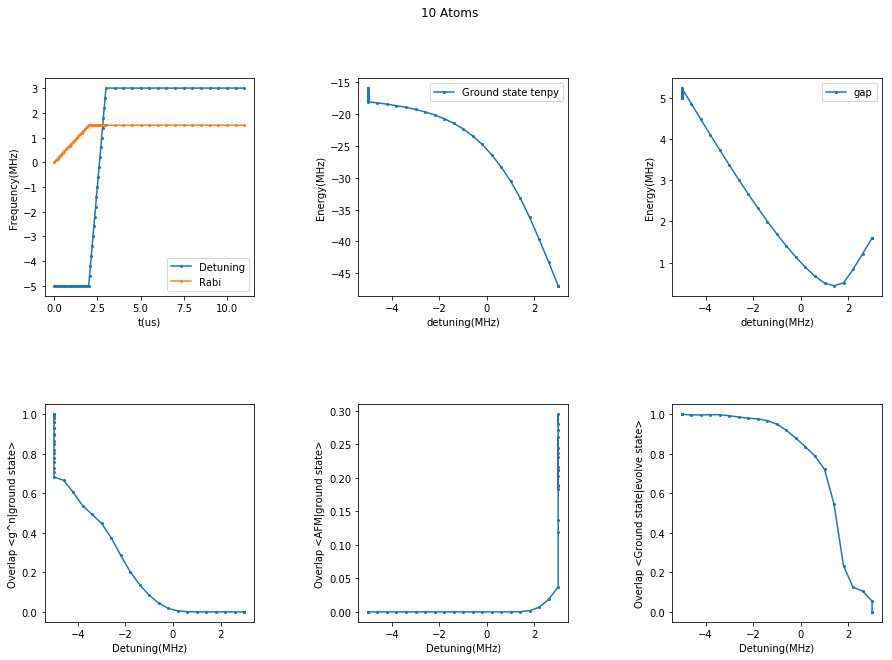

In [5]:
ms = 2
ls = '-'
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('10 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,0].plot(t,detuning,marker='o',markersize = ms,ls = ls,label = 'Detuning')
ax[0,0].plot(t,rabi,marker='o',markersize = ms,ls = ls,label = 'Rabi')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
ax[0,0].legend()

ax[0,1].plot(detuning,(E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state tenpy')
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].legend()

ax[0,2].plot(detuning,(E[:,2]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'gap')
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')

ax[0,2].legend()

ax[1,0].plot(detuning,overlap[:,0],marker='o',markersize = ms,ls = ls)
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|ground state>')

ax[1,1].plot(detuning,overlap[:,1],marker='o',markersize = ms,ls = ls)
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|ground state>')

ax[1,2].plot(detuning,overlap[:,2],marker='o',markersize = ms,ls = ls)
ax[1,2].set_xlabel('Detuning(MHz)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')

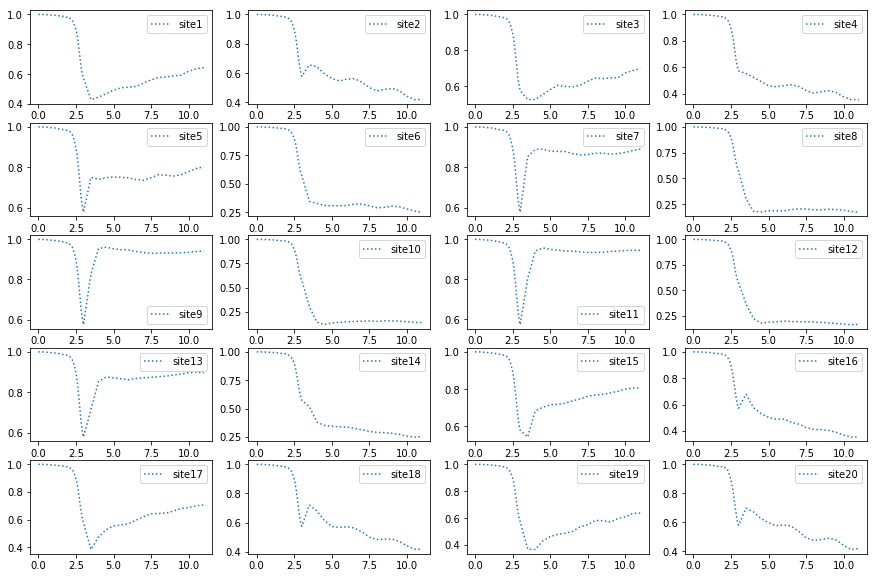

In [12]:
# benchmark ground state dynamics 
ms = 5
ls = ':'
fig, ax = plt.subplots(5, 4, figsize=(15,10))
for i in range(N):
    ax[i//4,i%4].plot(t,1-np.array(data['z'])[:,i],markersize = ms,ls = ls,label='site'+str(i+1))
    ax[i//4,i%4].legend()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [25]:
t[30]

2.4999999999999982

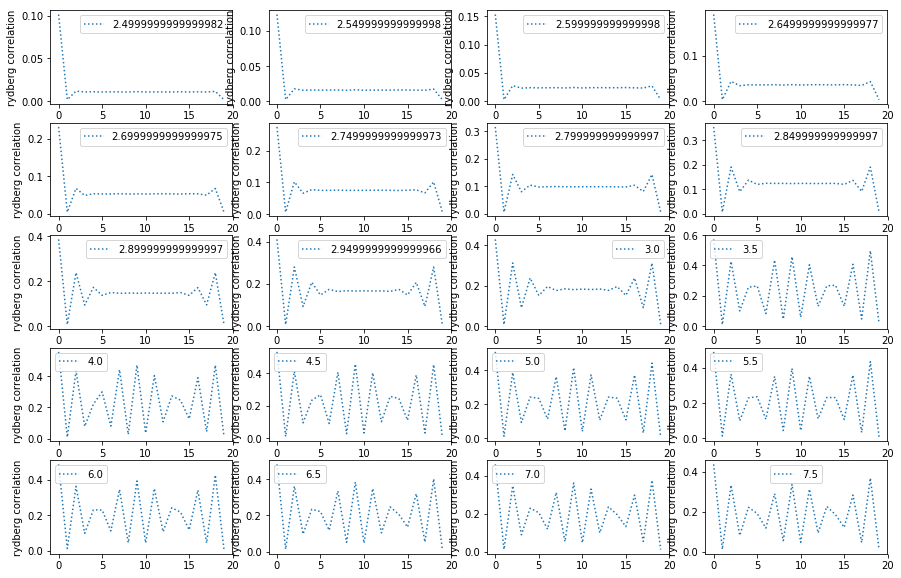

In [34]:
# benchmark rydberg state correlation to the j-th atom
j = 0
fig, ax = plt.subplots(5, 4, figsize=(15,10))
tsteps = len(t)
for k in range(30,50,1):
    k1 = k-30
    ax[k1//4,k1%4].plot(np.arange(20),np.array(data['zz'])[k,j,:],markersize = ms,ls = ls,label=t[k])
    ax[k1//4,k1%4].set_ylabel('rydberg correlation')
    ax[k1//4,k1%4].legend()

In [30]:
len(np.array(data['zz'])[k,j,:])

20